In [22]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np

In [3]:
from sklearn.datasets import load_boston

In [4]:
def read_boston_file():
    data=load_boston()
    features=np.array(data.data)
    target=np.array(data.target)
    return features,target

In [5]:
def feature_normalization_z(feature_data):
    mu=np.mean(feature_data,axis=0)
    std=np.std(feature_data,axis=0)
    return (feature_data-mu)/std

In [6]:
def append_bias(normalized_features,target):
    n_samples=normalized_features.shape[0]
    n_features=normalized_features.shape[1]
    intercept_feature=np.ones([n_samples,1])
    X=np.concatenate((normalized_features,intercept_feature),axis=1)
    X=np.reshape(X,[n_samples,n_features+1])
    Y=np.reshape(target,[n_samples,1])
    return X,Y

##### Simulating read_boston_file()

In [7]:
features,target=read_boston_file()

In [8]:
features.shape

(506, 13)

In [9]:
features[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [10]:
features[-1]

array([4.741e-02, 0.000e+00, 1.193e+01, 0.000e+00, 5.730e-01, 6.030e+00,
       8.080e+01, 2.505e+00, 1.000e+00, 2.730e+02, 2.100e+01, 3.969e+02,
       7.880e+00])

In [11]:
target.shape

(506,)

In [12]:
features.ndim

2

In [13]:
target.ndim

1

In [14]:
target[0:100]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2])

###### Simulating feature normalization

In [15]:
z_features=feature_normalization_z(features)

In [16]:
z_features[-1]

array([-0.41500016, -0.48772236,  0.11573841, -0.27259857,  0.15812412,
       -0.36276709,  0.43473151, -0.61324648, -0.98284286, -0.80321172,
        1.17646583,  0.44105193, -0.66905833])

In [17]:
X_input,Y_input=append_bias(z_features,target)

In [18]:
Y_input[0]

array([24.])

In [19]:
num_features=X_input.shape[1]

In [20]:
num_features

14

In [23]:
X=tf.placeholder(shape=[None, num_features], dtype=tf.float32)

In [24]:
X.shape

TensorShape([Dimension(None), Dimension(14)])

In [25]:
Y=tf.placeholder(tf.float32,[None,1])

In [26]:
Y.shape

TensorShape([Dimension(None), Dimension(1)])

In [27]:
w=tf.Variable(tf.random_normal([num_features,1]),name="weights")

In [28]:
# Defining hyperparameters
learning_rate=0.01
num_epochs=1000


In [29]:
cost_trace=[]

In [30]:
y_pred=tf.matmul(X,w)

In [31]:
error=y_pred-Y

In [32]:
cost=tf.reduce_mean(tf.square(error))

In [33]:
training_op=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [34]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(num_epochs):
        sess.run(training_op,feed_dict={X:X_input,Y:Y_input})
        loss_val=sess.run(cost,feed_dict={X:X_input,Y:Y_input})
        cost_trace.append(loss_val)
    error_=sess.run(error,feed_dict={X:X_input,Y:Y_input})
    pred_=sess.run(y_pred,feed_dict={X:X_input,Y:Y_input})

In [35]:
cost_trace[-1]


22.032825

In [36]:
import matplotlib.pyplot as plt

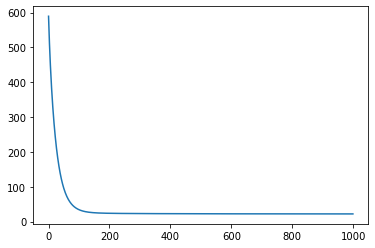

In [37]:
plt.plot(cost_trace)

Text(0, 0.5, 'Predicted House Price')

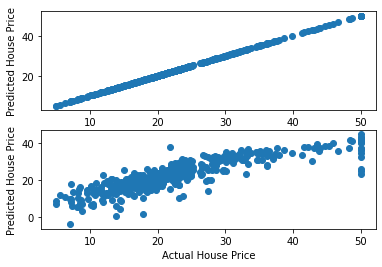

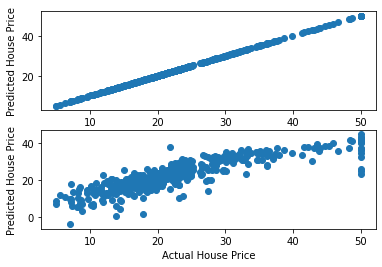

In [38]:
#Creates two subplots and unpacks the output array immediately


fig1,(ax1,ax2)=plt.subplots(2,1)
ax1.scatter(Y_input,Y_input)
ax1.set_xlabel("Actual House Price")
ax1.set_ylabel("Predicted House Price")

ax2.scatter(Y_input,pred_)
ax2.set_xlabel("Actual House Price")
ax2.set_ylabel("Predicted House Price")

fig2,(ax1,ax2)=plt.subplots(2,1)
ax1.scatter(Y_input,Y_input)
ax1.set_xlabel("Actual House Price")
ax1.set_ylabel("Predicted House Price")

ax2.scatter(Y_input,pred_)
ax2.set_xlabel("Actual House Price")
ax2.set_ylabel("Predicted House Price")

In [39]:
print(tf.__version__)

2.3.0
